# Building your Deep Neural Network: Step by Step

- Use non-linear units like ReLU to improve your model
- Build a deeper neural network (with more than 1 hidden layer)
- Implement an easy-to-use neural network class

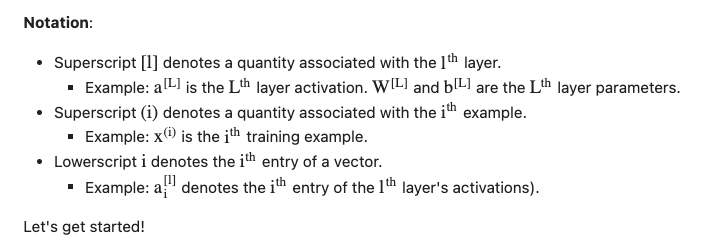

## 1 - Packages

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
# from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Outline of the Assignment

Here is an outline of this assignment, you will:

- Initialize the parameters for a two-layer network and for an `L-layer` neural network.
- Implement the forward propagation module (shown in purple in the figure below).
  - Complete the LINEAR part of a layer's forward propagation step (resulting in Z[l]).
  - We give you the ACTIVATION function (relu/sigmoid).
  - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
  - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer L). This gives you a new L_model_forward function.
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).
  - Complete the LINEAR part of a layer's backward propagation step.
  - We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward)
  - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
  - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally update the parameters.

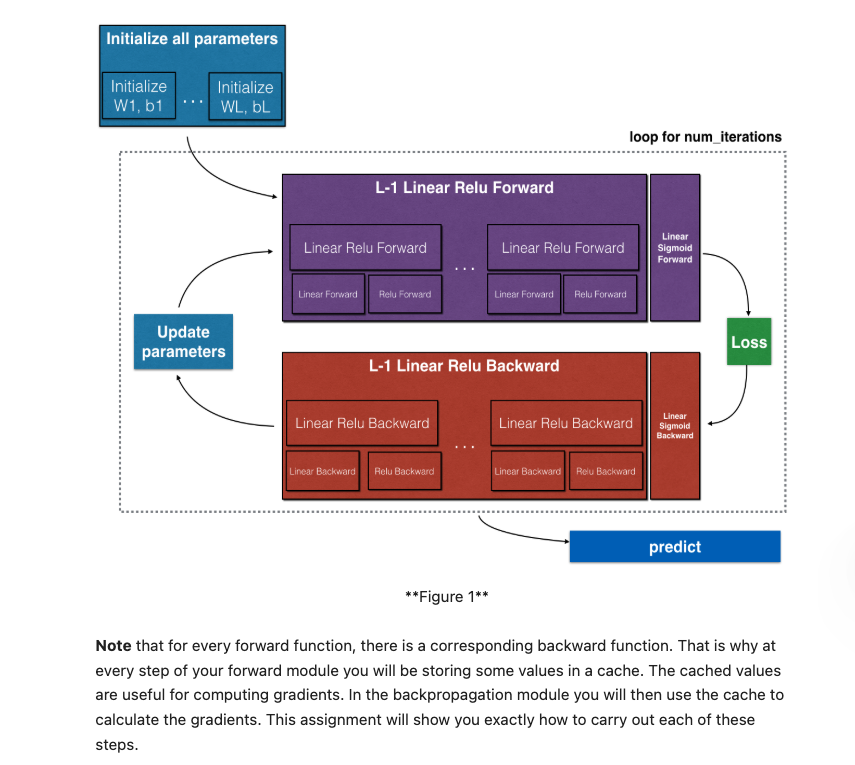

## 3 - Initialization

You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to L
 layers.

### 3.1 - 2-layer Neural Network

**Exercise**: Create and initialize the parameters of the 2-layer neural network.

**Instructions**:

- The model's structure is: `LINEAR -> RELU -> LINEAR -> SIGMOID.`
- Use random initialization for the weight matrices. Use `np.random.randn(shape)*0.01` with the correct shape.
- Use zero initialization for the biases. Use `np.zeros(shape)`.

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
  """
  Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

  Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
  """
  np.random.seed(1)

  W1 = np.random.randn(n_h,n_x) * 0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h) * 0.01
  b2 = np.zeros((n_y,1))

  assert(W1.shape == (n_h, n_x))
  assert(b1.shape == (n_h, 1))
  assert(W2.shape == (n_y, n_h))
  assert(b2.shape == (n_y, 1))

  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}

  return parameters

In [ ]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


### 3.2 - L-layer Neural Network

The initialization for a deeper `L-layer neural network` is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, you should make sure that your dimensions match between each layer. Recall that n[l] is the number of units in layer l. Thus for example if the size of our input X is (12288,209)(with m=209 examples) then:

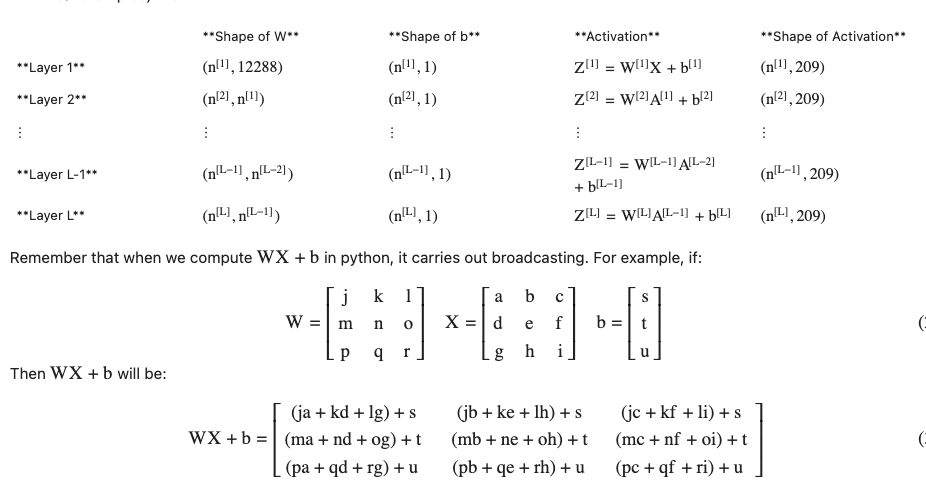


**Exercise**: Implement initialization for an L-layer Neural Network.

**Instructions**:

- The model's structure is [LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID. I.e., it has L−1 layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use np.random.randn(shape) * 0.01.
- Use zeros initialization for the biases. Use np.zeros(shape).
- We will store n[l], the number of units in different layers, in a variable layer_dims. For example, the layer_dims for the "Planar Data classification model" from last week would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means W1's shape was (4,2), b1 was (4,1), W2 was (1,4) and b2 was (1,1). Now you will generalize this to L layers!
- Here is the implementation for L=1 (one layer neural network). It should inspire you to implement the general case (L-layer neural network).

In [ ]:
def initialize_parameters_deep(layer_dims):
  """
  Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

  Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
  """
  np.random.seed(3)

  parameters = {}

  L = len(layer_dims)   # number of layers in the network

  for l in range(1, L):

    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
    parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

    assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
    assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

  return parameters

In [ ]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


## 4 - Forward propagation module

###4.1 - Linear Forward

Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.
- [LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

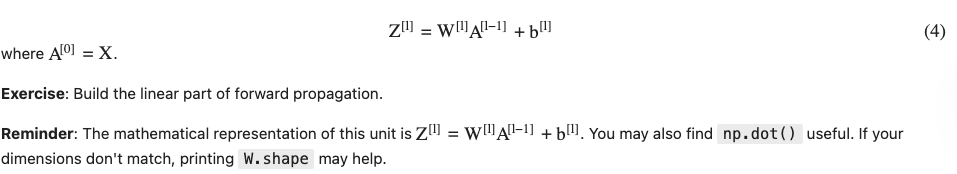


In [ ]:
def linear_forward(A, W, b):
  """
  Implement the linear part of a layer's forward propagation.

  Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

  Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
  """

  Z = np.dot(W,A) + b

  assert(Z.shape == (W.shape[0], A.shape[1]))
  cache = (A, W, b)

  return Z, cache


In [ ]:
# Z, linear_cache = linear_forward(A, W, b)
# print("Z = " + str(Z))

### 4.2 - Linear-Activation Forward

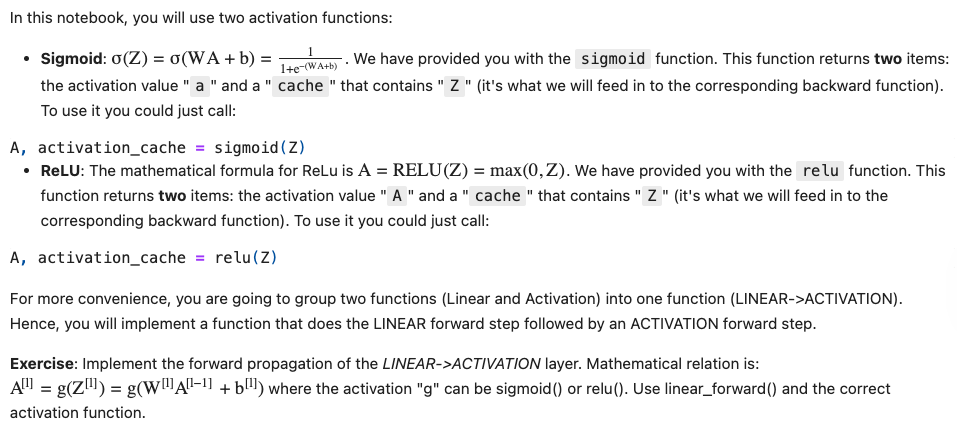

In [ ]:
import numpy as np

def sigmoid(Z):
  """
  Apply sigmoid activation function.

  Arguments:
    Z -- numpy array of any shape (output of the linear forward step)

  Returns:
    A -- output of sigmoid(Z), same shape as Z
    activation_cache -- dictionary containing "Z" for backpropagation
  """
  A = 1 / (1 + np.exp(-Z))  # Sigmoid function
  activation_cache = {"Z": Z}  # Store Z for backpropagation

  return A, activation_cache

def relu(Z):
  """
    Apply ReLU activation function.

    Arguments:
        Z -- numpy array of any shape (output of the linear forward step)

    Returns:
        A -- output of ReLU(Z), same shape as Z
        activation_cache -- dictionary containing "Z" for backpropagation
  """
  A = np.maximum(0, Z)  # Element-wise max(0, Z)
  activation_cache = {"Z": Z}  # Store Z for backpropagation

  return A, activation_cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
  """
  Implement the forward propagation for the LINEAR->ACTIVATION layer

  Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

  Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
  """

  if activation == "sigmoid":
    # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = sigmoid(Z) # This "activation_cache" contains "Z"

  elif activation == "relu":
    # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
    Z, linear_cache = linear_forward(A_prev, W, b) # This "linear_cache" contains (A_prev, W, b)
    A, activation_cache = relu(Z) # This "activation_cache" contains "Z"

  assert (A.shape == (W.shape[0], A_prev.shape[1]))
  cache = (linear_cache, activation_cache)

  return A, cache

# A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
# print("With sigmoid: A = " + str(A))

# A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
# print("With ReLU: A = " + str(A))


Note: In deep learning, the "[LINEAR->ACTIVATION]" computation is counted as a single layer in the neural network, not two layers.

### d) L-Layer Model

For even more convenience when implementing the L
-layer Neural Net, you will need a function that replicates the previous one `(linear_activation_forward with RELU)` L−1
 times, then follows that with one `linear_activation_forward` with SIGMOID.

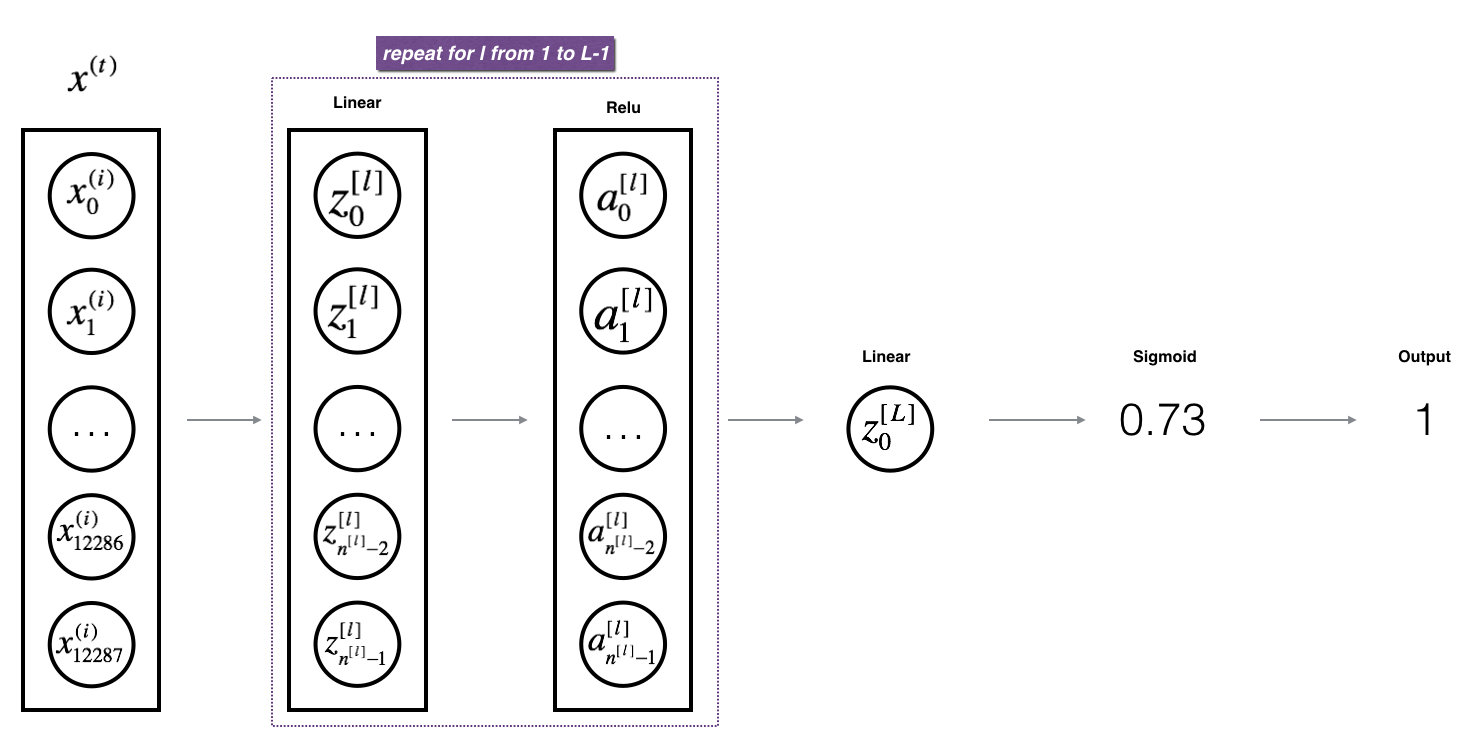

**Exercise**: Implement the forward propagation of the above model.

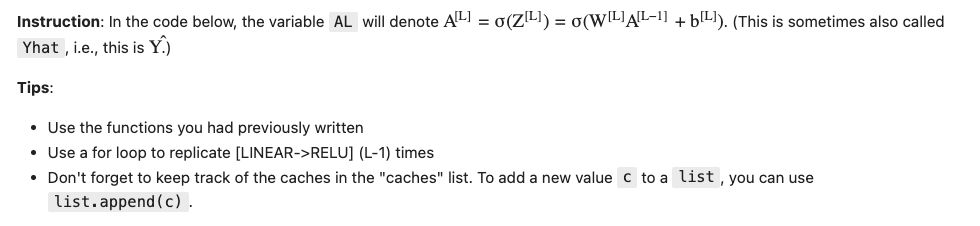

In [ ]:
def L_model_forward(X, parameters):
  """
  Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

  Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

  Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
  """

  caches = []
  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.

  for l in range(1, L):
    A_prev = A
    A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
    caches.append(cache)

  AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
  caches.append(cache)

  assert(AL.shape == (1,X.shape[1]))

  return AL, caches

In [ ]:
# AL, caches = L_model_forward(X, parameters)
# print("AL = " + str(AL))
# print("Length of caches list = " + str(len(caches)))

### 5 - Cost function
Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning.

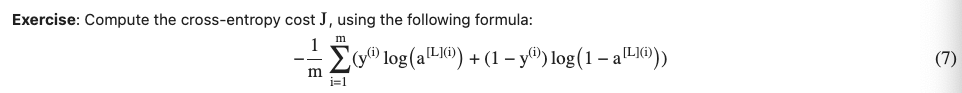

In [ ]:
def compute_cost(AL, Y):
  """
  Implement the cost function defined by equation (7).

  Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

  Returns:
    cost -- cross-entropy cost
  """

  m = Y.shape[1]

  # Compute loss from aL and y.


  cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))

## 6 - Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters.

**Figure 3** : Forward and Backward propagation for *LINEAR->RELU->LINEAR->SIGMOID*
*The purple blocks represent the forward propagation, and the red blocks represent the backward propagation.*
Now, similar to forward propagation, you are going to build the backward propagation in three steps:

LINEAR backward
LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
[LINEAR -> RELU] ×
 (L-1) -> LINEAR -> SIGMOID backward (whole model)


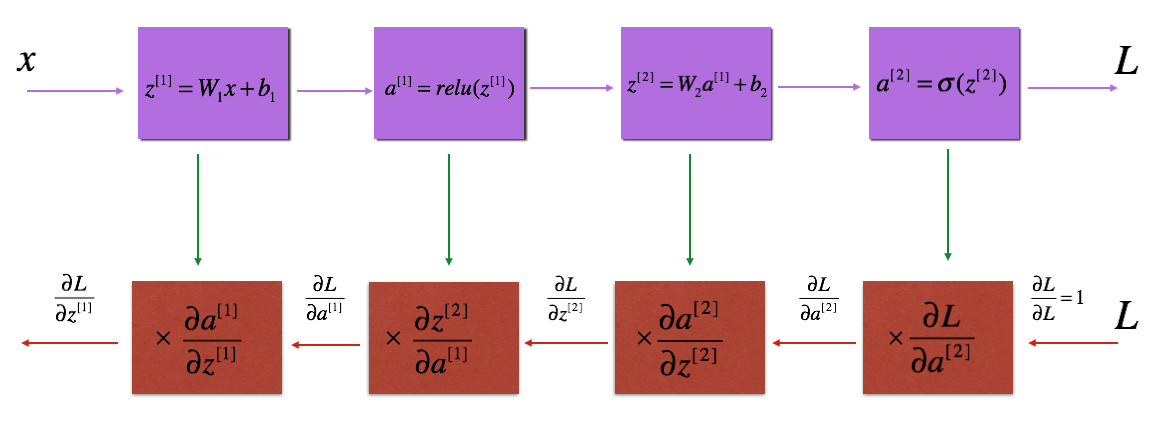

![CleanShot 2025-04-30 at 15.27.11.png](<attachment:CleanShot 2025-04-30 at 15.27.11.png>)
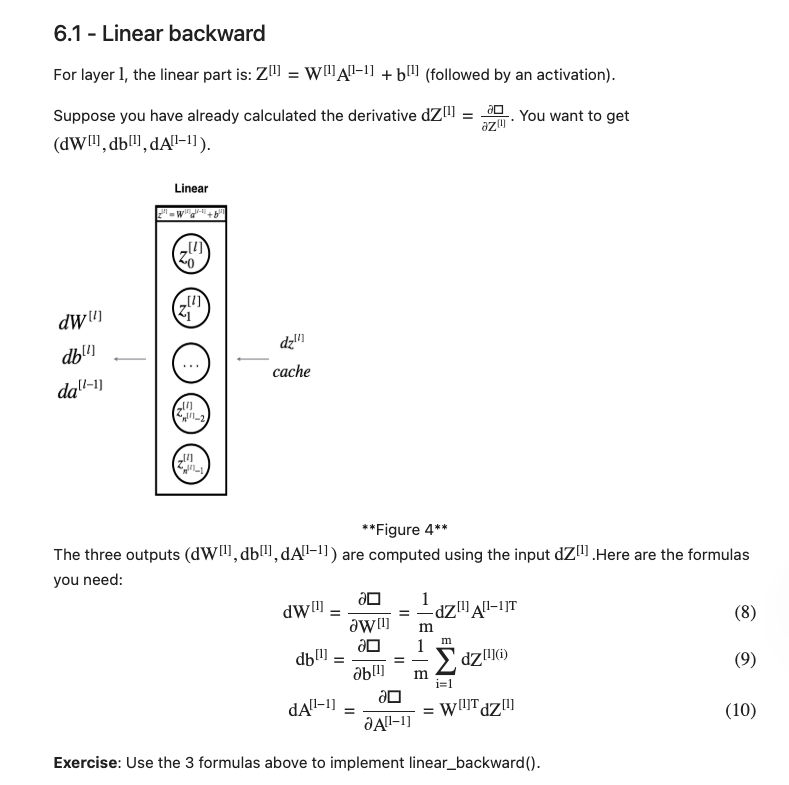

In [ ]:
def linear_backward(dZ, cache):
    # Here cache is "linear_cache" containing (A_prev, W, b) coming from the forward propagation in the current layer
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

![CleanShot 2025-04-30 at 15.28.01.png](<attachment:CleanShot 2025-04-30 at 15.28.01.png>)
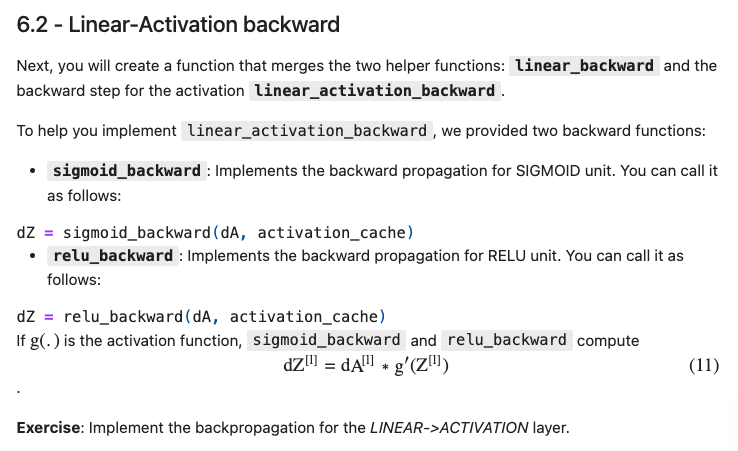

In [ ]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 1 line of code)
        dZ = relu_backward(dA, activation_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 1 line of code)
        dZ = sigmoid_backward(dA, activation_cache)
        ### END CODE HERE ###
    
    ### START CODE HERE ### (≈ 1 line of code)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    ### END CODE HERE ###
    
    return dA_prev, dW, db

6.3 - L-Model Backward
Now you will implement the backward function for the whole network. Recall that when you implemented the L_model_forward function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the L_model_backward function, you will iterate through all the hidden layers backward, starting from layer L
. On each step, you will use the cached values for layer l
 to backpropagate through layer l
. Figure 5 below shows the backward pass.

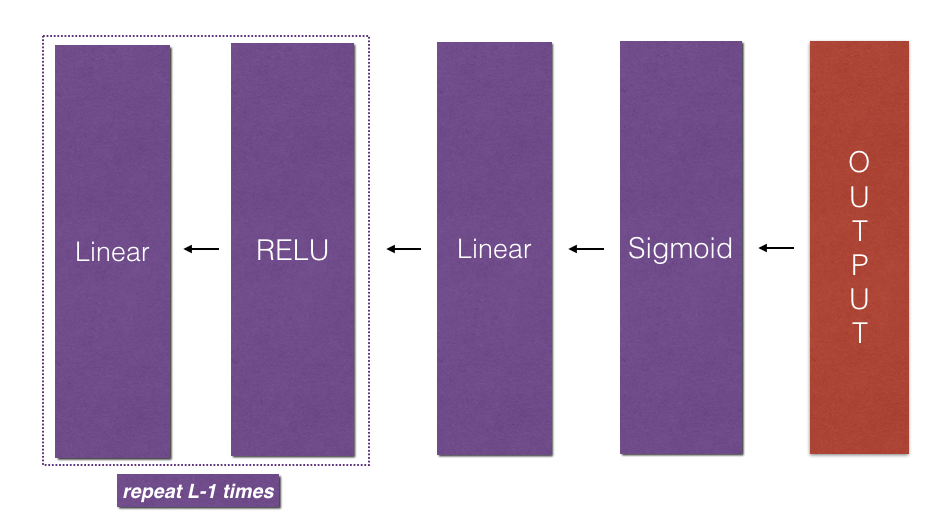

![CleanShot 2025-04-30 at 15.28.57.png](<attachment:CleanShot 2025-04-30 at 15.28.57.png>)
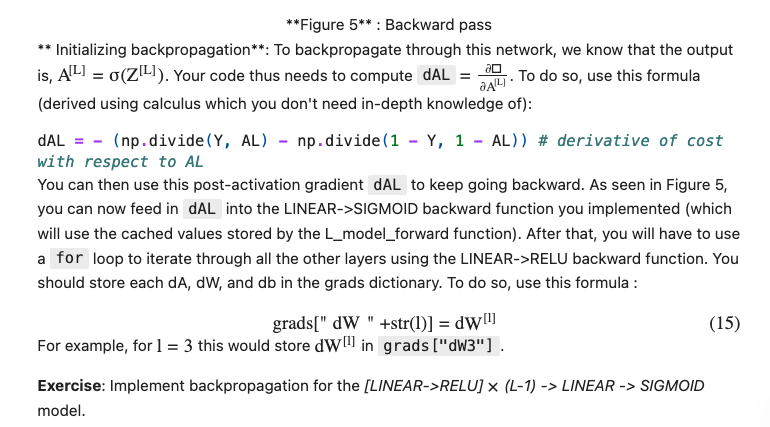

In [ ]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1] # Last Layer
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

## 6.4 - Update Parameters

![CleanShot 2025-04-30 at 15.29.34.png](<attachment:CleanShot 2025-04-30 at 15.29.34.png>)
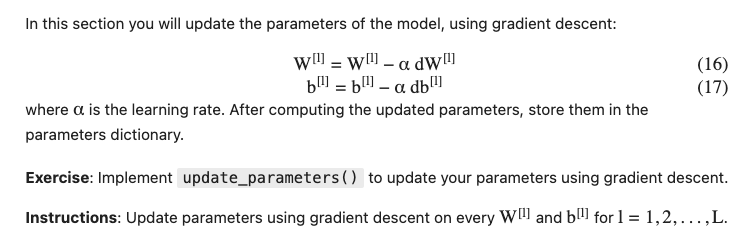

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters